### 專案名稱: 第四屆機器學習百日馬拉松
### 功能描述: 第42天作業
### 版權所有: Dunk  
### 程式撰寫: Dunk  
### 撰寫日期：2020/04/14
### 改版日期:  
### 改版備註:

## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

#### 前置作業

In [20]:
from sklearn import datasets, metrics,linear_model

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

## 建立模型四步驟

在 Scikit-learn 中，建立一個機器學習的模型其實非常簡單，流程大略是以下四個步驟

1. 讀進資料，並檢查資料的 shape (有多少 samples (rows), 多少 features (columns)，label 的型態是什麼？)
    - 讀取資料的方法：
        - **使用 pandas 讀取 .csv 檔：**pd.read_csv
        - **使用 numpy 讀取 .txt 檔：**np.loadtxt 
        - **使用 Scikit-learn 內建的資料集：**sklearn.datasets.load_xxx
    - **檢查資料數量：**data.shape (data should be np.array or dataframe)
2. 將資料切為訓練 (train) / 測試 (test)
    - train_test_split(data)
3. 建立模型，將資料 fit 進模型開始訓練
    - clf = DecisionTreeClassifier()
    - clf.fit(x_train, y_train)
4. 將測試資料 (features) 放進訓練好的模型中，得到 prediction，與測試資料的 label (y_test) 做評估
    - clf.predict(x_test)
    - accuracy_score(y_test, y_pred)
    - f1_score(y_test, y_pred)

In [21]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier()

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [22]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)
print(iris.feature_names)
print("Feature importance: ", clf.feature_importances_)

Acuuracy:  0.9736842105263158
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importance:  [0.01796599 0.         0.05992368 0.92211033]


### ANS:

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
>建立模型，改用熵編碼(預設值為gini)，正確率無改變，但是Feature importance改變了

#### 修改參數
[DecisionTreeClassifier用法](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html "DecisionTreeClassifier用法")

In [23]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

# 建立模型，改用熵編碼(預設值為gini)
clf = DecisionTreeClassifier(criterion="entropy")

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [24]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)
print(iris.feature_names)
print("Feature importance: ", clf.feature_importances_)

Acuuracy:  0.9736842105263158
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importance:  [0.0156062  0.         0.07501716 0.90937664]


#### 繪圖
前置作業
1. pip install pydotplus
2. 安裝[GraphViz’s executables](https://graphviz.gitlab.io/_pages/Download/Download_windows.html "GraphViz’s executables")
3. 如果執行錯誤，執行下列code

<code>
    
    import os
    os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
</code>    
版权声明：本文为CSDN博主「mx丶姜小辉」的原创文章，遵循 CC 4.0 BY-SA 版权协议，转载请附上原文出处链接及本声明。
原文链接：https://blog.csdn.net/qq_40304090/java/article/details/88594813

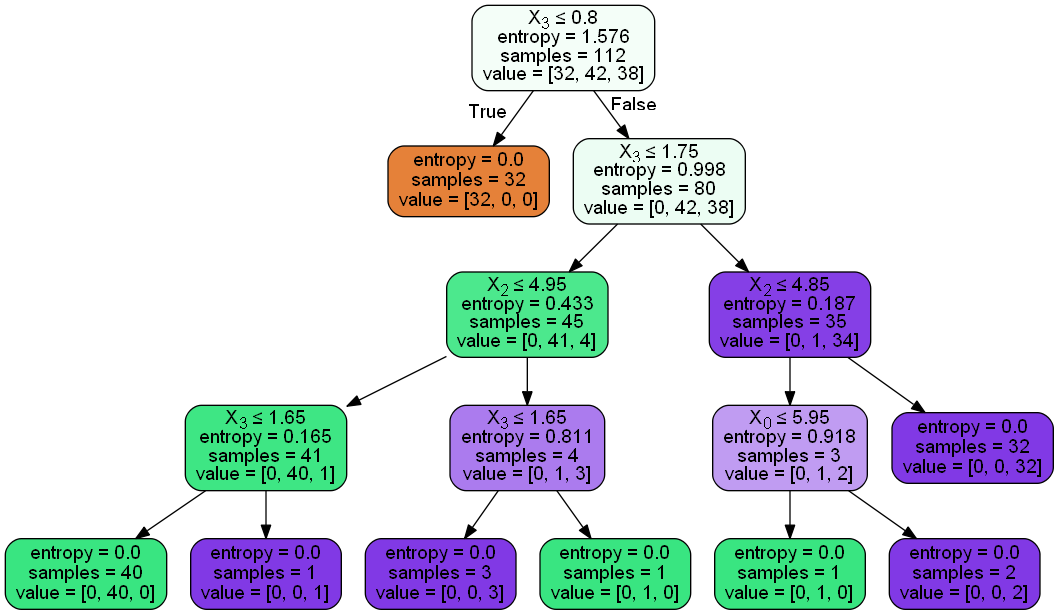

In [25]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
filled=True, rounded=True,
special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較
> 用決策樹回歸測試波士頓房產，結果較線性回歸差

此檔案使用scikit-learn 機器學習套件裡的linear regression演算法，來達成波士頓房地產價錢預測
- 資料集：波士頓房產
- 特徵：房地產客觀數據，如年份、平面大小
- 預測目標：房地產價格
- 機器學習方法：線性迴歸

>機器學習的監督式學習中主要分為回歸問題與分類問題。
>- 回歸代表預測的目標值為實數 (-∞ ⾄至 ∞)
>- 分類代表預測的目標值為類別 (0 或 1)
>- 本案例使用回歸

In [26]:
# 讀取波士頓DataSet
boston_X, boston_y = datasets.load_boston(return_X_y=True)

#### linear regression演算法

In [27]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston_X, boston_y, test_size=0.25, random_state=4)

# 建立一個線性回歸模型
regr = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

In [28]:
# 可以看回歸模型的參數值
print('Coefficients: ', regr.coef_)
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Coefficients:  [-1.18901558e-01  5.05689401e-02 -1.07427433e-02  3.66184857e+00
 -1.52957329e+01  3.39316181e+00 -5.91222130e-03 -1.49234402e+00
  3.33696220e-01 -1.50593743e-02 -8.69475207e-01  8.80571095e-03
 -4.92763225e-01]
Mean squared error: 26.95


####  DecisionTreeRegressor

In [29]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston_X, boston_y, test_size=0.25, random_state=4)

# 建立一個決策樹回歸模型
degr = DecisionTreeRegressor()

# 將訓練資料丟進去模型訓練
degr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = degr.predict(x_test)

In [30]:
# 可以看回歸模型的參數值
print("Feature importance: ", degr.feature_importances_)
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))


Feature importance:  [6.75709224e-02 1.13331360e-03 7.52880774e-03 5.16062560e-05
 3.15751800e-02 5.42714179e-01 1.39930507e-02 6.77524510e-02
 1.10194942e-03 1.00365997e-02 2.48597267e-02 8.44844688e-03
 2.23233767e-01]
Mean squared error: 25.53


In [31]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(degr, out_file=dot_data,
filled=True, rounded=True,
special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())